<a href="https://colab.research.google.com/github/DiShaYa/DataAnalyz/blob/main/%D0%98%D1%81%D0%B2%D0%B8%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1

In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer,util
!pip install transformers
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

In [ ]:
import pandas as pd
csv_file1 = '/content/drive/MyDrive/colab_files/ответы.csv'
data1 = pd.read_csv(csv_file1, header=None)
answers = data1[1].tolist()
print(answers)
text1='представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране'
sentences_encoded1 = model.encode(text1)

for answer in answers:
  text2 = answer
  sentences_encoded2 = model.encode(text2)
  scores = util.pytorch_cos_sim(sentences_encoded1, sentences_encoded2)
  print(answer ,': ',scores.item())




['Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе.', 'Растровое изображение – это изображение, состоящее из множества точек-пикселей, количество которых влияет на качество картинки.', 'Представление в виде цветных точек.', 'Набор пикселей на экране отображающего устройства.', 'Растровое изображение – изображение, представляющее собой сетку пикселей.', 'Изображение, которое состоит из пикселей(прямоугольных цветных точек).', 'Изображение, состоящее из пикселей', 'Сетка пикселей разных цветов', 'Растровое изображение - изображение, состоящее из массива пикселей (цветных точек). Размер изображения может выражаться количество пикселей по высоте и ширине (1920х1080). Существует несколько цветовых моделей RGB, CMYK, XYZ и др.', 'Набор пикселей разного цвета, из которых формируется изображения.', 'Растровое изображение — изображение, представляющее собой сетку пикселей — цветных точек (обычно прямоугольных) на мониторе, бумаге и других отобража

In [ ]:
correct_answer=text1   # это верный ответ
sum_vector=model.encode(correct_answer)    # за начальное значение суммы возьмем вектор правильного ответа
right_answers = []  # из файла выбрала верные ответы студентов
for index, row in data1.iterrows():
  if row[2] == 1:
    right_answers.append(row[1])
print(right_answers)


['Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе.', 'Растровое изображение – это изображение, состоящее из множества точек-пикселей, количество которых влияет на качество картинки.', 'Представление в виде цветных точек.', 'Набор пикселей на экране отображающего устройства.', 'Растровое изображение – изображение, представляющее собой сетку пикселей.', 'Изображение, которое состоит из пикселей(прямоугольных цветных точек).', 'Изображение, состоящее из пикселей', 'Сетка пикселей разных цветов', 'Растровое изображение - изображение, состоящее из массива пикселей (цветных точек). Размер изображения может выражаться количество пикселей по высоте и ширине (1920х1080). Существует несколько цветовых моделей RGB, CMYK, XYZ и др.', 'Набор пикселей разного цвета, из которых формируется изображения.', 'Растровое изображение — изображение, представляющее собой сетку пикселей — цветных точек (обычно прямоугольных) на мониторе, бумаге и других отобража

In [ ]:
for answer in right_answers:
    vector = model.encode(answer)       # в цикле находим вектор каждого ответа
    sum_vector=sum_vector+vector   #  суммируем
    average_vector=sum_vector/(len(right_answers)+1)  #  находим средний вектор
vector_correct=model.encode(correct_answer)   # еще раз вектор верного ответа
stud_answers=[] # из файла все ответы студентов
stud_answers = data1[1].tolist()


for stud_answer in stud_answers:
    stud_vector=model.encode(stud_answer)      # в цикле находим вектор каждого ответа
    scores = util.pytorch_cos_sim(stud_vector,vector_correct)    # косинус между вектором ответа студента и верным ответом
    scores1 = util.pytorch_cos_sim(stud_vector,average_vector)   # косинус между вектором ответа студента и вектором среднего ответа
    print('cos между вектором ответа и вектором верного ответа ',scores.item(),'; cos между вектором ответа и средним вектором',scores1.item())

cos между вектором ответа и вектором верного ответа  0.6199578642845154 ; cos между вектором ответа и средним вектором 0.8371569514274597
cos между вектором ответа и вектором верного ответа  0.5997003316879272 ; cos между вектором ответа и средним вектором 0.7817568778991699
cos между вектором ответа и вектором верного ответа  0.29691433906555176 ; cos между вектором ответа и средним вектором 0.537868857383728
cos между вектором ответа и вектором верного ответа  0.6049377918243408 ; cos между вектором ответа и средним вектором 0.646841287612915
cos между вектором ответа и вектором верного ответа  0.5544369220733643 ; cos между вектором ответа и средним вектором 0.8223647475242615
cos между вектором ответа и вектором верного ответа  0.5917736291885376 ; cos между вектором ответа и средним вектором 0.8767520785331726
cos между вектором ответа и вектором верного ответа  0.5497787594795227 ; cos между вектором ответа и средним вектором 0.7475199699401855
cos между вектором ответа и векторо

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate
import textwrap

print('Вопрос: Что такое растровое представление изображения?')
print('Ответ: представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране')

csv_file = '/content/drive/MyDrive/colab_files/ответы.csv'
data = pd.read_csv(csv_file, header=None, names=['№', 'Ответ', 'Верный?'])

columns = [ "№", "Ответ", "Верный?",
           "Косинусное\nсходство с\nверным\nответом", "Абс. разн.\n(столбцы\n3 и 4)",
            "Косинусное\nсходство со\nср.\nверным\nответом", "Абс. разн.\n(столбцы\n3 и 6)" ]
df = pd.DataFrame(columns=columns)

# Добавляем 14 пустых строк
for i in range(25): df.loc[i] = [i+1, "", "", "", "", "", ""]

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

scores1_list = []
stud_answers = data['Ответ'].tolist()

colvo = 0;
colvo1=0;
for stud_answer in stud_answers:
  stud_vector = model.encode(stud_answer)
  scores1 = util.pytorch_cos_sim(stud_vector, average_vector)
  scores1_list.append(scores1.item())

for index, row in data.iterrows():
    wrapped_answer = textwrap.fill(row['Ответ'], width=30)
    df.at[index, '№'] = row['№']
    df.at[index, 'Ответ'] = wrapped_answer
    df.at[index, 'Верный?'] = row['Верный?']

    # Вычисление косинусного сходства
    text2 = row['Ответ']
    sentences_encoded2 = model.encode(text2)
    scores = util.pytorch_cos_sim(sentences_encoded1, sentences_encoded2)

    # Запись косинусного сходства в таблицу
    cosine_similarity_value = scores.item()
    df.at[index, 'Косинусное\nсходство с\nверным\nответом'] = cosine_similarity_value

    abs_diff = abs(float(row['Верный?']) - cosine_similarity_value)
    df.at[index, 'Абс. разн.\n(столбцы\n3 и 4)'] = abs_diff

    if (abs_diff) <= 0.5:
      colvo = colvo +1;

    df.at[index, 'Косинусное\nсходство со\nср.\nверным\nответом'] = scores1_list[index]

    df.at[index, 'Абс. разн.\n(столбцы\n3 и 6)'] = abs(cosine_similarity_value - scores1_list[index])
    if (abs(cosine_similarity_value - scores1_list[index])) <= 0.5:
      colvo1 = colvo1 +1;

print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))
#для абс. разности 3 и 4 столбца
print ('кол-во <=0,5 (абс. разность 3 и 4): ',colvo)
#для абс. разности 3 и 6 столбца
print ('кол-во <=0,5 (абс. разность 3 и 6): ',colvo1)

Вопрос: Что такое растровое представление изображения?
Ответ: представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране
+-----+--------------------------------+-----------+--------------+--------------+---------------+--------------+
|   № | Ответ                          |   Верный? |   Косинусное |   Абс. разн. |    Косинусное |   Абс. разн. |
|     |                                |           |   сходство с |     (столбцы |   сходство со |     (столбцы |
|     |                                |           |       верным |       3 и 4) |           ср. |       3 и 6) |
|     |                                |           |      ответом |              |        верным |              |
|     |                                |           |              |              |       ответом |              |
+=====+================================+===========+==============+==============+===============+==============+
|   1 | Растровое изображение          |         

# 2


In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer,util
!pip install transformers

In [ ]:
model2 = SentenceTransformer('sentence-transformers/quora-distilbert-multilingual')
from transformers import AutoTokenizer, AutoModel
import torch

In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране", "Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе."]

model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')
embeddings = model.encode(sentences)
print(embeddings)
text1 = "представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране"
sentences_encoded1 = model.encode(text1)
text2="Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе."
sentences_encoded2 = model.encode(text2)
scores = util.pytorch_cos_sim(sentences_encoded1, sentences_encoded2)
print(text2 ,': ',scores.item())

[[ 0.06600832 -0.02981267  0.00767549 ... -0.00490003 -0.05163955
  -0.01815942]
 [ 0.06768945  0.01298246 -0.01926334 ...  0.0206659   0.0157731
  -0.00746093]]
Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе. :  0.6199578642845154


Проверка на аналогичность функций

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch
import torch.nn.functional as F
from sklearn.metrics.pairwise import cosine_similarity

# Ваши предложения
sentences = ["представление изображения в виде множества отдельных точек (пикселей) на мониторе, экране",
             "Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе."]

# Загрузка модели
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

# Вычисление эмбеддингов
embeddings = model.encode(sentences)
print(embeddings, '!')

# Код для сравнения текстов
text1 = "представление изображения в виде множества отдельных точек (пикселей) на мониторе, экране"
text2 = "Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе."

# Вычисление эмбеддингов для каждого текста
sentences_encoded1 = model.encode(text1)
sentences_encoded2 = model.encode(text2)

# Вычисление косинусного сходства с использованием библиотеки sentence-transformers
scores = util.pytorch_cos_sim(sentences_encoded1, sentences_encoded2) #вычисление косинусного сходство для первой модели с старой библиотекой
print(f"{text2} : {scores.item()}, '@'")

# Вычисление косинусного сходства с использованием sklearn
sentence_embeddings = model.encode(sentences)
sentence_embeddings = torch.nn.functional.normalize(torch.tensor(sentence_embeddings), p=2, dim=1).numpy()

cosine_sim = cosine_similarity([sentence_embeddings[0]], [sentence_embeddings[1]])
print(f"Cosine similarity (sklearn) for sentences: {cosine_sim[0][0]}") #вычисление кос сходства для первой модели с новой бибилотекой


[[ 0.06600832 -0.02981267  0.00767549 ... -0.00490003 -0.05163955
  -0.01815942]
 [ 0.06768945  0.01298246 -0.01926334 ...  0.0206659   0.0157731
  -0.00746093]] !
Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе. : 0.6199578642845154, '@'
Cosine similarity (sklearn) for sentences: 0.6199580430984497


для новой модели использую новую библиотеку для вычисления косинусного сходства


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

#
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

sentences = ["представление изображения в виде множества отдельных точек (пикселей) на мониторе, экране"]

stud_answers=[] # из файла все ответы студентов
stud_answers = data1[1].tolist()

tokenizer2 = AutoTokenizer.from_pretrained('sentence-transformers/quora-distilbert-multilingual')
model2 = AutoModel.from_pretrained('sentence-transformers/quora-distilbert-multilingual')

encoded_input1 = tokenizer2(sentences, padding=True, truncation=True, return_tensors='pt')
encoded_input = tokenizer2(stud_answers, padding=True, truncation=True, return_tensors='pt')


with torch.no_grad():
    model_output = model2(**encoded_input)
    model_output1 = model2(**encoded_input1)


sentence_embeddings1 = mean_pooling(model_output1, encoded_input1['attention_mask'])
sentence_embeddings1 = torch.nn.functional.normalize(sentence_embeddings1, p=2, dim=1)

sentence_embeddings1 = sentence_embeddings1.detach().numpy()


sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
sentence_embeddings = torch.nn.functional.normalize(sentence_embeddings, p=2, dim=1)

sentence_embeddings = sentence_embeddings.detach().numpy()

sentence_embeddingsй = model.encode(right_answers, convert_to_tensor=True)
stud_embeddings = model.encode(stud_answers, convert_to_tensor=True)
mean_embedding = sentence_embeddingsй.mean(dim=0)

# Вычисление косинусного сходства между средним вектором и ответами студентов
cosine_scores = util.pytorch_cos_sim(mean_embedding, stud_embeddings)

# Вывод результатов
for i in range(len(stud_answers)):
    print(f"Cosine similarity between mean vector and student answer '{stud_answers[i]}': {cosine_scores[0][i]:.4f}")

for i in range(len(stud_answers)):
  cosine_sim = cosine_similarity([sentence_embeddings1[0]], [sentence_embeddings[i]])
  print("Cos Sim between the sentences: ", stud_answers[i],{cosine_sim[0][0]})



Cosine similarity between mean vector and student answer 'Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе.': 0.8358
Cosine similarity between mean vector and student answer 'Растровое изображение – это изображение, состоящее из множества точек-пикселей, количество которых влияет на качество картинки.': 0.7793
Cosine similarity between mean vector and student answer 'Представление в виде цветных точек.': 0.5431
Cosine similarity between mean vector and student answer 'Набор пикселей на экране отображающего устройства.': 0.6383
Cosine similarity between mean vector and student answer 'Растровое изображение – изображение, представляющее собой сетку пикселей.': 0.8243
Cosine similarity between mean vector and student answer 'Изображение, которое состоит из пикселей(прямоугольных цветных точек).': 0.8788
Cosine similarity between mean vector and student answer 'Изображение, состоящее из пикселей': 0.7466
Cosine similarity between mean vector 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate
import textwrap

print('Вопрос: Что такое растровое представление изображения?')
print('Ответ: представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране')

csv_file = '/content/drive/MyDrive/colab_files/ответы.csv'
data = pd.read_csv(csv_file, header=None, names=['№', 'Ответ', 'Верный?'])

columns = [ "№", "Ответ", "Верный?",
           "Косинусное\nсходство с\nверным\nответом", "Абс. разн.\n(столбцы\n3 и 4)",
            "Косинусное\nсходство со\nср.\nверным\nответом", "Абс. разн.\n(столбцы\n3 и 6)" ]
df = pd.DataFrame(columns=columns)

# Добавляем 14 пустых строк
for i in range(25): df.loc[i] = [i+1, "", "", "", "", "", ""]

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

scores1_list = []
stud_answers = data['Ответ'].tolist()

kolvo = 0;
kolvo1 = 0;

# Вывод результатов


for i in range(len(stud_answers)):
  cosine_sim = cosine_similarity([sentence_embeddings1[0]], [sentence_embeddings[i]])

for index, row in data.iterrows():
    wrapped_answer = textwrap.fill(row['Ответ'], width=30)
    df.at[index, '№'] = row['№']
    df.at[index, 'Ответ'] = wrapped_answer
    df.at[index, 'Верный?'] = row['Верный?']
    cosine_sim = cosine_similarity([sentence_embeddings1[0]], [sentence_embeddings[index]])
    # Получаем косинусное сходство с верным ответом
    cosine_similarity_value = cosine_scores[0][index]  # Значение косинусного сходства с верным ответом
    #Получаем косинусное сходство со средним верным ответом
    cosine_sim_mean = cosine_sim[0][0]

    df.at[index, 'Косинусное\nсходство с\nверным\nответом'] = cosine_similarity_value

    abs_diff = abs(float(row['Верный?']) - cosine_similarity_value)
    df.at[index, 'Абс. разн.\n(столбцы\n3 и 4)'] = abs_diff
    if abs_diff <= 0.5:
      kolvo = kolvo +1;

    #
    df.at[index, 'Косинусное\nсходство со\nср.\nверным\nответом'] = cosine_sim[0][0]

    df.at[index, 'Абс. разн.\n(столбцы\n3 и 6)'] = abs(float(row['Верный?']) - cosine_sim[0][0])

    if abs(float(row['Верный?']) - cosine_sim[0][0]) <= 0.5:
      kolvo1 = kolvo1 +1;



print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))
#для абс. разности 3 и 4 столбца
print ('кол-во <=0,5 (абс. разность 3 и 4): ',kolvo)
#для абс. разности 3 и 6 столбца
print ('кол-во <=0,5 (абс. разность 3 и 6): ',kolvo1)

Вопрос: Что такое растровое представление изображения?
Ответ: представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране
+-----+--------------------------------+-----------+--------------+--------------+---------------+--------------+
|   № | Ответ                          |   Верный? |   Косинусное |   Абс. разн. |    Косинусное |   Абс. разн. |
|     |                                |           |   сходство с |     (столбцы |   сходство со |     (столбцы |
|     |                                |           |       верным |       3 и 4) |           ср. |       3 и 6) |
|     |                                |           |      ответом |              |        верным |              |
|     |                                |           |              |              |       ответом |              |
+=====+================================+===========+==============+==============+===============+==============+
|   1 | Растровое изображение          |         

#3-4


In [ ]:
#Исправить орфографические, грамматические и др. ошибки в ответах студентов, удалить из ответа студента слова, встречающиеся в вопросе
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer,util
!pip install transformers
import pandas as pd

mod = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

csv_file1 = '/content/drive/MyDrive/colab_files/ответы_испр.csv'
datas = pd.read_csv(csv_file1, header=None)
corr_answers = datas[1].tolist()
print(corr_answers)


['Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе.', 'Растровое изображение – это изображение, состоящее из множества точек-пикселей, количество которых влияет на качество картинки.', 'Представление в виде цветных точек.', 'Набор пикселей на экране отображающего устройства.', 'Растровое изображение – изображение, представляющее собой сетку пикселей.', 'Изображение, которое состоит из пикселей(прямоугольных цветных точек).', 'Изображение, состоящее из пикселей', 'Сетка пикселей разных цветов', 'Растровое изображение - изображение, состоящее из массива пикселей (цветных точек). Размер изображения может выражаться в количестве пикселей по высоте и ширине (1920х1080). Существует несколько цветовых моделей RGB, CMYK, XYZ и др.', 'Набор пикселей разного цвета, из которых формируется изображение.', 'Растровое изображение — изображение, представляющее собой сетку пикселей — цветных точек (обычно прямоугольных) на мониторе, бумаге и других отобра

['растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе.', 'растровое изображение – это изображение, состоящее из множества точек-пикселей, количество которых влияет на качество картинки.', 'представление в виде цветных точек.', 'набор пикселей на экране отображающего устройства.', 'растровое изображение – изображение, представляющее собой сетку пикселей.', 'изображение, которое состоит из пикселей(прямоугольных цветных точек).', 'изображение, состоящее из пикселей', 'сетка пикселей разных цветов', 'растровое изображение - изображение, состоящее из массива пикселей (цветных точек). размер изображения может выражаться в количестве пикселей по высоте и ширине (1920х1080). существует несколько цветовых моделей rgb, cmyk, xyz и др.', 'набор пикселей разного цвета, из которых формируется изображение.', 'растровое изображение — изображение, представляющее собой сетку пикселей — цветных точек (обычно прямоугольных) на мониторе, бумаге и других отобра

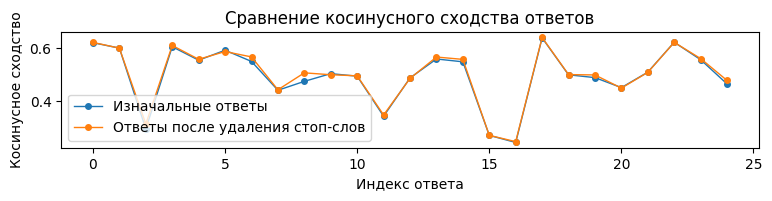

In [ ]:
#Приведение к нижнему регистру
import matplotlib.pyplot as plt
low_corr_answers = [response.lower() for response in corr_answers]
print(low_corr_answers)

right_answer='представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране'
sentences_encoded2 = mod.encode(right_answer)
# Список для хранения значений
values_list = []

for low_corr_answer in low_corr_answers:
  cur_answer = low_corr_answer
  sentences_encoded3 = mod.encode(cur_answer)
  values = util.pytorch_cos_sim(sentences_encoded2, sentences_encoded3)
  values_list.append(values.item())


csv_file2 = '/content/drive/MyDrive/colab_files/ответы_испр.csv'
data1 = pd.read_csv(csv_file1, header=None)
answers = data1[1].tolist()
print(answers)
text1='представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране'
sentences_encoded1 = mod.encode(text1)

scores_list = []
for answer in answers:
  text2 = answer
  sentences_encoded2 = mod.encode(text2)
  scores = util.pytorch_cos_sim(sentences_encoded1, sentences_encoded2)
  scores_list.append(scores.item())

score_delta = 0

print("Ответы (score) \t    | Ответы с нижним регистром (value)")
for  score, value in zip(scores_list, values_list):
  if score > value:
    print( f'{score} > {value}')
    score_delta -= 1
  elif score < value:
    print(f'{score} < {value}')
    score_delta += 1
  else:
    print(f'{score} = {value}')

if score_delta > 0:
  print("Итог: В среднем, ответы с нижним регистром имеют большее косинусное сходство.")
elif score_delta < 0:
  print("Итог: В среднем, исходные ответы имеют большее косинусное сходство.")
else:
  print("Итог: Нет значимой разницы между косинусным сходством ответов с нижним регистром и исходных ответов.")

# Построение графика
plt.figure(figsize=(9, 1.5))
plt.plot(scores_list, label='Изначальные ответы', marker='o',linewidth=1,markersize=4)
plt.plot(values_list, label='Ответы после удаления стоп-слов', marker='o',linewidth=1,markersize=4)

# Добавление подписей к осям и заголовка
plt.xlabel('Индекс ответа')
plt.ylabel('Косинусное сходство')
plt.title('Сравнение косинусного сходства ответов')

plt.legend()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Проверка списка стоп-слов для русского языка:
['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']


Исходный текст:            представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране
После удаления стоп-слов:  представление изображения виде множества отдельных точек (пикселей) мониторе, экране


представление изображения виде множества отдельных точек (пикселей) мониторе, экране
растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе.  -  растровое изображение представляет собой сетку (мозаику) пикселей – цветных точек мониторе. :  0.6049354672431946
растровое изображение – это изображение, состоящее из множества точек-пикселей, количество которых влияет на качество картинки.  -  растровое изображение – это изображение, состоящее множества точек-пикселей, количество которых влияет качество картинки. :  0.5909641981124878
представление в виде цветных точек.  -  представление виде цветных точек. :  0.333978

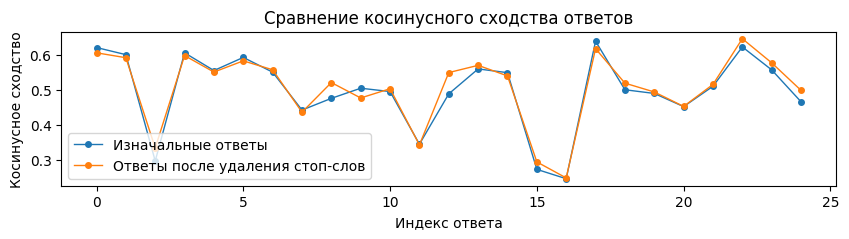

In [ ]:
#Удаление стоп-слов
# сравнили исправленные слова с нижнем регистром с теми же словами только после удаления стоп слов тк бибилотека чувствительная к регистру
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Загрузка необходимых ресурсов
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # Дополнительно загружаем для синтаксического анализа

# Проверка, что ресурсы загружены успешно
print("Проверка списка стоп-слов для русского языка:")
print(stopwords.words('russian')[:10])


# Загрузка списка стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))

# Удаление стоп-слов
filtered_right_answer = [word for word in right_answer.split() if not word.lower() in stop_words]
print('\n')
print("Исходный текст:           ", right_answer)
print("После удаления стоп-слов: ", " ".join(filtered_right_answer))
print('\n')
filtered_right_answer = " ".join(filtered_right_answer)
print(filtered_right_answer)
value_right_stop = mod.encode(filtered_right_answer)

scores4_list = []
for answer in low_corr_answers:
  text4 = " ".join([word for word in answer.split() if not word.lower() in stop_words])
  sentences_encoded4 = mod.encode(text4)
  scores4 = util.pytorch_cos_sim(value_right_stop, sentences_encoded4)
  scores4_list.append(scores4.item())
  print(answer,' - ', text4, ': ', scores4.item())

scores_list = []
for answer in answers:
  text2 = answer
  sentences_encoded2 = mod.encode(text2)
  scores = util.pytorch_cos_sim(sentences_encoded1, sentences_encoded2)
  scores_list.append(scores.item())

# Анализ и вывод результатов
print("\nОтветы \t           | Ответы после удаления стоп-слов")
score_delta1 = 0
for score1, value1 in zip(scores_list, scores4_list):
  if score1 > value1:
    print(f'{score1} > {value1}')
    score_delta1 -= 1
  elif score1 < value1:
    print(f'{score1} < {value1}')
    score_delta1 += 1
  else:
    print(f'{score1} = {value1}')

if score_delta1 > 0:
  print("Итог: В среднем, ответы после удаления стоп-слов имеют большее косинусное сходство.")
elif score_delta1 < 0:
 print("Итог: В среднем, исходные ответы имеют большее косинусное сходство.")
else:
  print("Итог: Нет значимой разницы между косинусным сходством исходных ответов и ответов после удаления стоп-слов.")


# Построение графика
plt.figure(figsize=(10, 2))
plt.plot(scores_list, label='Изначальные ответы', marker='o',linewidth=1,markersize=4)
plt.plot(scores4_list, label='Ответы после удаления стоп-слов', marker='o',linewidth=1,markersize=4)

# Добавление подписей к осям и заголовка
plt.xlabel('Индекс ответа')
plt.ylabel('Косинусное сходство')
plt.title('Сравнение косинусного сходства ответов')

plt.legend()
plt.show()

In [ ]:
#знаки припинания
#проеверяется без учета регистра
!pip install spacy

# Загрузка модели для русского языка
!python -m spacy download ru_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 20.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Растровое изображение представляет собой сетку (мозаику) из пикселей – цветных точек на мониторе.  -  Растровое изображение представляет собой сетку мозаику из пикселей цветных точек на мониторе :  0.6616175770759583
Растровое изображение – это изображение, состоящее из множества точек-пикселей, количество которых влияет на качество картинки.  -  Растровое изображение это изображение состоящее из множества точек пикселей количество которых влияет на качество картинки :  0.6879248023033142
Представление в виде цветных точек.  -  Представление в виде цветных точек :  0.31063881516456604
Набор пикселей на экране отображающего устройства.  -  Набор пикселей на экране отображающего устройства :  0.6796128749847412
Растровое изображение – изображение, представляющее собой сетку пикселей.  -  Растровое изображение изображение представляющее собой сетку пикселей :  0.6421501040458679
Изображение, которое состоит из пикселей(прямоугольных цветных точек).  -  Изображение которое состоит из пиксе

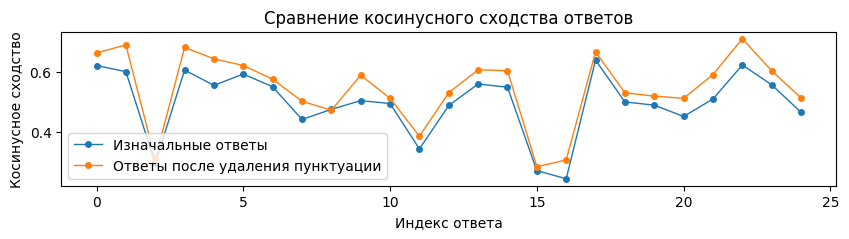

In [ ]:
import spacy

# Загрузка модели для русского языка
nlp = spacy.load('ru_core_news_sm')


csv_file2 = '/content/drive/MyDrive/colab_files/ответы_испр.csv'
data1 = pd.read_csv(csv_file1, header=None)
answers = data1[1].tolist()


right_answer = "представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране"
right_encoded = mod.encode(right_answer)

scores_list = []
for answer in answers:
  text2 = answer
  sentences_encoded2 = mod.encode(text2)
  scores = util.pytorch_cos_sim(right_encoded, sentences_encoded2)
  scores_list.append(scores.item())


# Обработка текста с помощью spaCy
doc = nlp(right_answer)
right_punct = " ".join([token.text for token in doc if not token.is_punct])
right_punct_encoded = mod.encode(right_punct)

values_punct_list = []
for canswer in corr_answers:
  # Удаление знаков препинания
  cdoc = nlp(canswer)
  puncts = " ".join([token.text for token in cdoc if not token.is_punct])
  puncts_encoded = mod.encode(puncts)
  values_punct = util.pytorch_cos_sim(right_punct_encoded, puncts_encoded)
  values_punct_list.append(values_punct.item())
  print(canswer,' - ', puncts, ': ', values_punct.item())

# Анализ и вывод результатов
print("\nОтветы \t           | Ответы после удаления пунктуации")
score_delta7 = 0
for score7, value7 in zip(scores_list, values_punct_list):
  if score7 > value7:
    print(f'{score7} > {value7}')
    score_delta7 -= 1
  elif score1 < value1:
    print(f'{score7} < {value7}')
    score_delta7 += 1
  else:
    print(f'{score7} = {value7}')

if score_delta7 > 0:
  print("Итог: В среднем, ответы после удаления стоп-слов имеют большее косинусное сходство.")
elif score_delta7 < 0:
 print("Итог: В среднем, исходные ответы имеют большее косинусное сходство.")
else:
  print("Итог: Нет значимой разницы между косинусным сходством исходных ответов и ответов после удаления стоп-слов.")


# Построение графика
plt.figure(figsize=(10, 2))
plt.plot(scores_list, label='Изначальные ответы', marker='o',linewidth=1,markersize=4)
plt.plot(values_punct_list, label='Ответы после удаления пунктуации', marker='o',linewidth=1,markersize=4)

# Добавление подписей к осям и заголовка
plt.xlabel('Индекс ответа')
plt.ylabel('Косинусное сходство')
plt.title('Сравнение косинусного сходства ответов')

plt.legend()
plt.show()

представление изображение в вид множество отдельный точка ( пиксель )   на монитор , экран
растровый изображение представлять себя сетка ( мозаика ) из пиксель – цветной точка на монитор . :  0.6829608678817749
растровый изображение – это изображение , состоять из множество точка - пикселей , количество которых влиять на качество картинка . :  0.6222438812255859
представление в вид цветной точка . :  0.2811163365840912
набор пиксель на экран отображать устройство . :  0.6184171438217163
растровый изображение – изображение , представлять себя сетка пиксель . :  0.6284563541412354
изображение , которое состоять из пикселей(прямоугольных цветной точка ) . :  0.5710830092430115
изображение , состоять из пиксель :  0.5633450746536255
сетка пиксель разный цвет :  0.4508057236671448
растровый изображение - изображение , состоять из массив пиксель ( цветной точка ) . размер изображение мочь выражаться в количество пиксель по высота и ширина ( 1920х1080 ) . существовать несколько цветовой модел

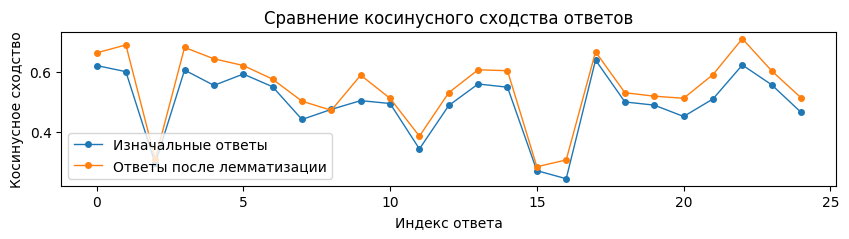

In [ ]:
#Лемматизация
#проеверяется без учета регистра
import spacy

csv_file2 = '/content/drive/MyDrive/colab_files/ответы_испр.csv'
data1 = pd.read_csv(csv_file1, header=None)
answers = data1[1].tolist()


right_answer = "представление изображения в виде множества отдельных точек (пикселей)  на мониторе, экране"
right_encoded = mod.encode(right_answer)

scores_list = []
for answer in answers:
  text2 = answer
  sentences_encoded2 = mod.encode(text2)
  scores = util.pytorch_cos_sim(right_encoded, sentences_encoded2)
  scores_list.append(scores.item())


# Обработка текста с помощью spaCy
doc = nlp(right_answer)
right_lemma = " ".join([token.lemma_ for token in doc])
print(right_lemma)
right_lemma_encoded = mod.encode(right_lemma)

values_lemma_list = []
for canswer in corr_answers:
  # Лемматизация
  cdoc = nlp(canswer)
  lemmas = " ".join([token.lemma_ for token in cdoc])
  lemmas_encoded = mod.encode(lemmas)
  values_lemma = util.pytorch_cos_sim(right_lemma_encoded, lemmas_encoded)
  values_lemma_list.append(values_lemma.item())
  print(lemmas,': ', values_lemma.item())

# Анализ и вывод результатов
print("\nОтветы \t           | Ответы после лемматизации")
score_delta8 = 0
for score8, value8 in zip(scores_list, values_lemma_list):
  if score8 > value8:
    print(f'{score8} > {value8}')
    score_delta8 -= 1
  elif score8 < value8:
    print(f'{score8} < {value8}')
    score_delta8 += 1
  else:
    print(f'{score8} = {value8}')

if score_delta8 < 0:
    print("Итог: В среднем, исходные ответы имеют большее косинусное сходство.")
elif score_delta8 > 0:
    print("Итог: В среднем, ответы после лемматизации имеют большее косинусное сходство.")
else:
    print("Итог: Нет значимой разницы между косинусным сходством исходных ответов и ответов после лемматизации.")

# Построение графика
plt.figure(figsize=(10, 2))
plt.plot(scores_list, label='Изначальные ответы', marker='o',linewidth=1,markersize=4)
plt.plot(values_punct_list, label='Ответы после лемматизации', marker='o',linewidth=1,markersize=4)

# Добавление подписей к осям и заголовка
plt.xlabel('Индекс ответа')
plt.ylabel('Косинусное сходство')
plt.title('Сравнение косинусного сходства ответов')

plt.legend()
plt.show()

In [ ]:
#влияние повторяющихся слов ответах

In [ ]:
#общее

In [ ]:
#для анализа вопрос аи ответа использовать тоже косинусное сходство

In [ ]:
#Что сделать или как обьяснить почему модель оценивает непраивльные ответы как правильные и наоборот

In [ ]:
#Ваше мнение относительно формулировки вопроса – как изменить, уточнить формулировку, стоит ли
#продолжать работу по данному вопросу. Возможно ли для проверки ответов или для составления вопросов
#применить сервисы генерации, например, YandexGPT?